In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
import collections
import statistics as stats
from nltk.corpus import stopwords
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DatasetAsistocovid.csv to DatasetAsistocovid.csv


In [ ]:
df =  pd.read_csv('/content/DatasetAsistocovid.csv') 
df['fecha']=pd.to_datetime(df.fecha, infer_datetime_format=True)

In [ ]:
df

,ID_evento,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
0,0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,2020-03-25,17:16:57
1,1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25,17:16:57
2,2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,2020-03-25,17:17:23
3,3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25,17:17:23
4,4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,2020-03-25,17:18:4
...,...,...,...,...,...,...,...,...
23374,23374,21c953e3096d4d2a8efcf9f0ea93ba17,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10,20:18:59
23375,23375,6d3ba6b127574379b87708ba6ce8a316,user,ask_datos,0.456839,Infecrados hoy cordoba,2020-06-10,20:36:13
23376,23376,6d3ba6b127574379b87708ba6ce8a316,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10,20:36:14
23377,23377,85913d6328f94070a7cf57ba1c393d7e,user,get_started,1.000000,/get_started,2020-06-10,20:42:4


In [ ]:
df.shape

(23379, 8)

In [ ]:
df.dtypes

ID_evento                   int64
ID_conversacion            object
evento                     object
categoria                  object
confidence                float64
texto                      object
fecha              datetime64[ns]
hora                       object
dtype: object

# 1- Frecuencia de las palabras usadas por los usuarios y por el bot.
Gráfico de frecuencias, qué distribución podría tener la variable?

In [ ]:
texto_user= list(df[df.evento=='user'].texto) #Obtenemos el listado de sentencias del user
texto_bot= list(df[df.evento=='bot'].texto)# Obtenemos el listado de sentencias del bot

def preprossessing(doc): #Generamos una función para extraer las palabras en un sólo listado y limpiar de caracteres especiales
  words=[]
  for frase in doc:
    frase= str(frase)
    for w in frase.split(" "):
      w= w.lower().replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u')
      words.append(w)

  return words

doc_user=preprossessing(texto_user)
doc_bot=preprossessing(texto_bot)

print (len(doc_user), ' palabras del user')
print (len(doc_bot), ' palabras del bot')



38148  palabras del user
354135  palabras del bot


In [ ]:
corpus_user = (' '.join(e for e in doc_user if e.isalnum()).split())#Removemos caracteres especiales (evitamos que palabras como 'supermercado' y 'supermercado?' sean distintas)
corpus_bot = (' '.join(e for e in doc_bot if e.isalnum()).split())#Removemos caracteres especiales

#Genereamos un contador de frecuencias de palabras y obtenemos los estadísticos
frecs_user = collections.Counter(corpus_user)
frecs_bot = collections.Counter(corpus_bot)

print( 'Palabras del User')
print('minimo: ',min(frecs_user.values()))
print('media: ',round(stats.mean(frecs_user.values()),2))
print('maximo: ',max(frecs_user.values()))
print('mediana: ',stats.median(frecs_user.values()))
print ('moda : ',stats.mode(frecs_user.values()))

print('--------------------------')

print( 'Palabras del bot')
print('minimo: ',min(frecs_bot.values()))
print('media: ',round(stats.mean(frecs_bot.values()),2))
print('maximo: ',max(frecs_bot.values()))
print('mediana: ',stats.median(frecs_bot.values()))
print ('moda : ',stats.mode(frecs_bot.values()))

Palabras del User
minimo:  1
media:  12.81
maximo:  1068
mediana:  2.0
moda :  1
--------------------------
Palabras del bot
minimo:  1
media:  187.26
maximo:  20226
mediana:  23.0
moda :  1


In [ ]:
frecs_user.most_common()[:10]

[('que', 1068),
 ('en', 1043),
 ('de', 957),
 ('puedo', 876),
 ('a', 815),
 ('el', 770),
 ('hay', 676),
 ('cuantos', 668),
 ('la', 659),
 ('casos', 626)]

A través de los estadísticos observamos que para el 'user' cada palabra empleada tiene una frecuencia media de 12.81, la media indica que la mitad de las pablaras se repiten hasta 2 veces y la otra mitad de dos en adelante.
Hay una palabra que se repite 1068 veces (correspondiente a la palabra 'que' que luego removemos y catalogamos como una stopword)

Retiramos las stopwords

In [ ]:
import nltk
nltk.download('stopwords')
stopws = set(stopwords.words('spanish'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vemos como cambian los estadísticos cuando retiramos las stopwords

In [ ]:
user_sin_stopws =[item for item in corpus_user if item not in stopws]

bot_sin_stopws = [item for item in corpus_bot if item not in stopws]



frecs_user_filtrado = collections.Counter(user_sin_stopws)
frecs_bot_filtrado = collections.Counter(bot_sin_stopws)

print( 'Palabras del User')
print('minimo: ',min(frecs_user_filtrado.values()))
print('media: ',round(stats.mean(frecs_user_filtrado.values()),2))
print('maximo: ',max(frecs_user_filtrado.values()))
print('mediana: ',stats.median(frecs_user_filtrado.values()))
print ('moda : ',stats.mode(frecs_user_filtrado.values()))

print('--------------------------')

print( 'Palabras del bot')
print('minimo: ',min(frecs_bot_filtrado.values()))
print('media: ',round(stats.mean(frecs_bot_filtrado.values()),2))
print('maximo: ',max(frecs_bot_filtrado.values()))
print('mediana: ',stats.median(frecs_bot_filtrado.values()))
print ('moda : ',stats.mode(frecs_bot_filtrado.values()))

Palabras del User
minimo:  1
media:  7.71
maximo:  876
mediana:  2
moda :  1
--------------------------
Palabras del bot
minimo:  1
media:  98.9
maximo:  4153
mediana:  22.0
moda :  1


Vemos que al al retirar las stopwords los valores para la media y el maximo disminuyen.
Se oberva también la diferencia respecto a las palabras utilizadas por el bot, las cuales indican que utiliza menor cantidad de palabras con mucha repetición, probablemente por el formato estandarizado de respuestas que posee.


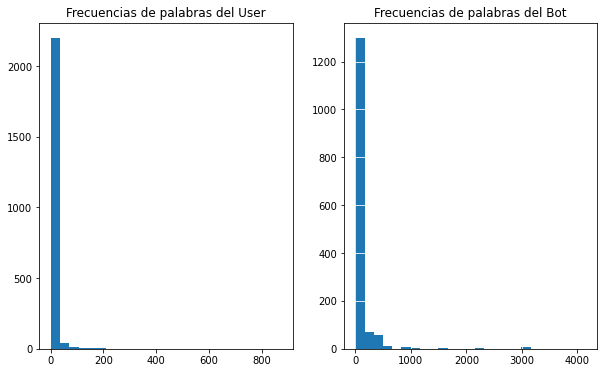

In [ ]:
f= plt.figure(figsize=(10,6))
ax1= f.add_subplot(121)
plt.hist(list(frecs_user_filtrado.values()), bins=25, density=False)
plt.title('Frecuencias de palabras del User')


ax2= f.add_subplot(122)
plt.grid(color='w', linestyle='solid')
plt.hist(frecs_bot_filtrado.values(), bins=25, density=False)
plt.title('Frecuencias de palabras del Bot')



plt.show()
#ley de Zipf (se usan pocas palabras muchas veces)

Los gráficos nos indican que tanto en user como en bot, se utilizan muchas palabras pocas veces.
Parece tener un comportamiento similar la ley de de Zipf.

In [ ]:
frecs_user_filtrado.most_common()[:20]

[('puedo', 876),
 ('cuantos', 668),
 ('casos', 626),
 ('ir', 452),
 ('hola', 400),
 ('si', 345),
 ('salir', 334),
 ('coronavirus', 189),
 ('puede', 188),
 ('sintomas', 187),
 ('cordoba', 178),
 ('cuarentena', 168),
 ('debo', 158),
 ('estan', 150),
 ('hacer', 130),
 ('hago', 127),
 ('casa', 127),
 ('covid', 119),
 ('usar', 117),
 ('virus', 116)]

Los graficos se asimilan a una distribución geométrica



**Se podría tomar además alguna visualización de las frecuencias y su cambio con la variable tiempo.**

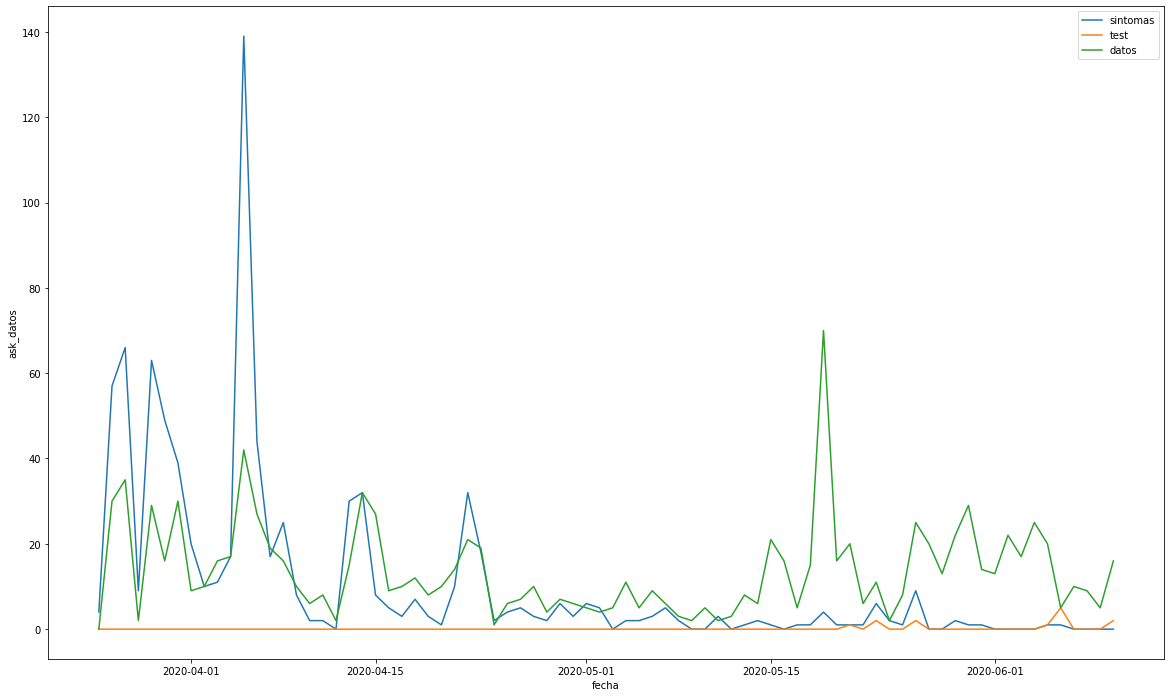

In [ ]:
cat=pd.crosstab(df.fecha, df.categoria)
plt.figure(figsize=(20,12))
sns.lineplot(data=cat, x=cat.index, y=cat.ask_sintomas, label='sintomas')
sns.lineplot(data=cat, x=cat.index, y=cat.ask_test, label='test')
sns.lineplot(data=cat, x=cat.index, y=cat.ask_datos, label='datos')


#Poner titulos y comentarios!!

Elegimos tres categoria para visualizar: síntomas, test y datos. Podemos suponer que al principio de la cuarentena las preguntas se correspondían con la categoría síntomas, lo cual puede sonar lógico en una población que en ese momento necesitaba más información acerca de los śintomas y una vez que dicha información resultó suficiente, la frecuencia a lo largo del tiempo disminuyó.

Con la categoría datos (referida a cantidad de fallecidos, infectados, etc) podemos llegar a pensar que tuvo un aumento en los últimos días debido a que la gente estaba más pendiente de la cantidad de contagios, ya que estan vinculados al prolongamiento o no de las medidas de aislamiento, o al seguimiento de brotes en distintos puntos del país.


**Puede además incluir nubes de palabras.**


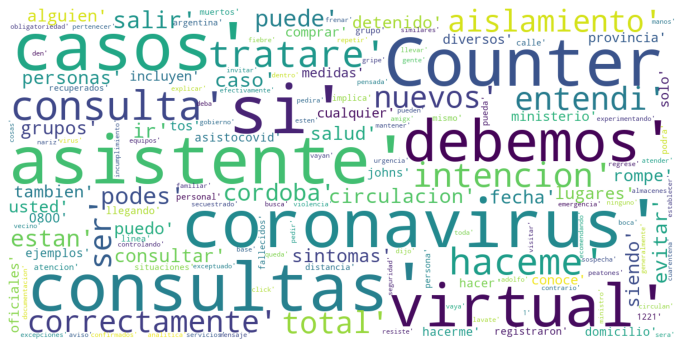

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopws,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(frecs_user_filtrado) .

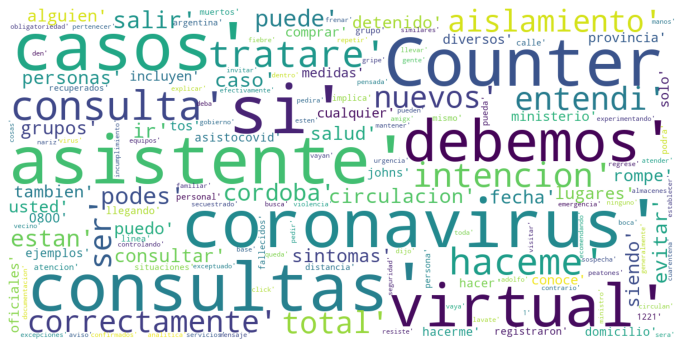

In [ ]:
#Para el caso del Bot...
show_wordcloud(frecs_bot_filtrado)

# 2- Cantidad de eventos o conversaciones por fecha, con lo que se podría observar la evolución del asistente en el tiempo.


En este caso graficamos la cantidad de eventos por fecha, para comparar la cantidad de eventos generadas por el user vs el bot.

Vemos que al principio las preguntas del user superan al bot, pero a lo largo del tiempo se van equiparando.

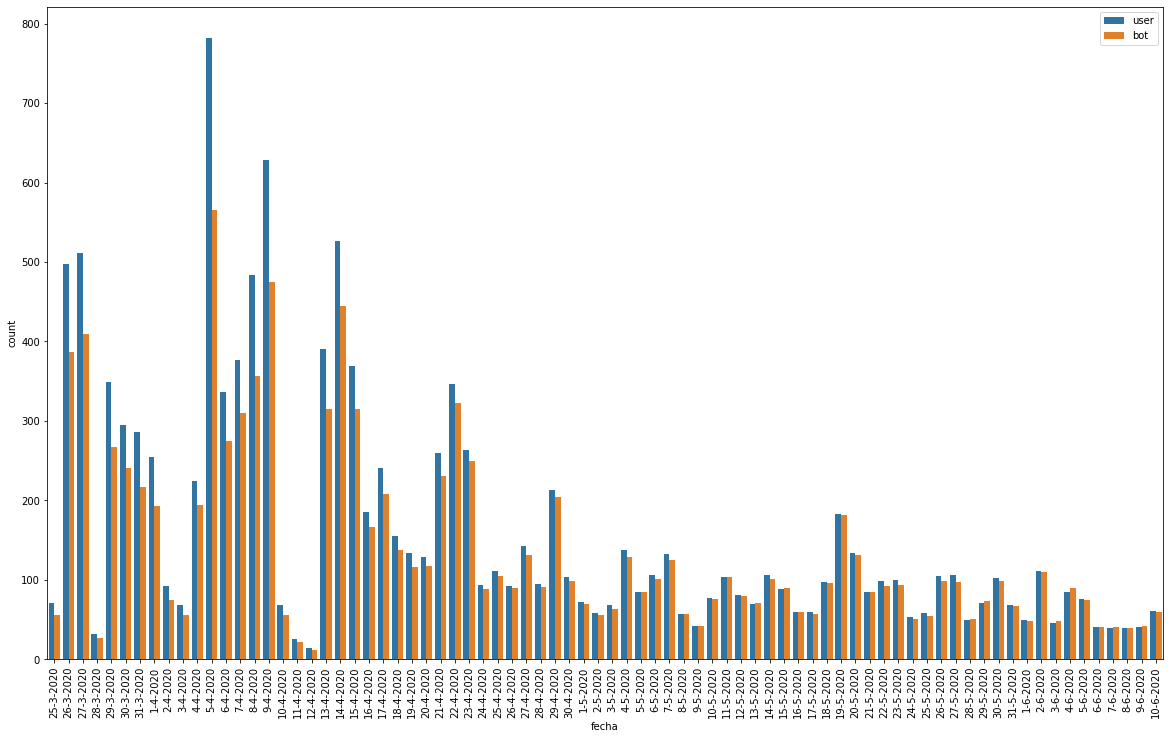

In [ ]:
fig= plt.figure(figsize=(20,12))
sns.countplot(data=df, x='fecha', hue='evento')
plt.xticks(rotation=90)
plt.legend()

# 3- Cantidad de respuestas fallidas del bot por fecha.


In [ ]:
#3- Cantidad de respuestas fallidas del bot por fecha.

In [ ]:
df2 = df[df['texto'].str.contains("Disculpame", na=False)]
df2


,ID_evento,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
7,7,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Probar de nu...",2020-03-25,17:18:25
9,9,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Probar de nu...",2020-03-25,17:18:39
14,14,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Probar de nu...",2020-03-25,17:19:32
195,195,954f538d-b362-4700-991e-82a443666518,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Probar de nu...",2020-03-26,11:16:20
199,199,954f538d-b362-4700-991e-82a443666518,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Probar de nu...",2020-03-26,11:16:26
...,...,...,...,...,...,...,...,...
11927,11927,b85fe50c39ad41bd9709ad4648a62b99,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Puedes proba...",2020-04-15,23:53:40
11935,11935,b85fe50c39ad41bd9709ad4648a62b99,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Puedes proba...",2020-04-15,23:53:59
12080,12080,ac47fa6035c94b10b1400b19ba14414f,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Puedes proba...",2020-04-16,10:53:22
21882,21882,66f85d9ce1824ba4b1c56c8b0a2239c9,bot,NaN,NaN,"Disculpame, pero no te entendí. 🤷 Puedes proba...",2020-05-30,7:15:26


In [ ]:
df2.groupby('fecha')['texto'].count()
cat2= pd.crosstab(df2.fecha, df2.texto)
cat2


texto,"Disculpame, pero no te entendí. 🤷 Probar de nuevo?","Disculpame, pero no te entendí. 🤷 Puedes probar de nuevo?"
fecha,,
2020-03-25,3,0
2020-03-26,5,0
2020-03-27,8,0
2020-03-28,1,0
2020-03-30,16,0
2020-03-31,1,0
2020-04-05,6,0
2020-04-08,10,0
2020-04-09,16,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

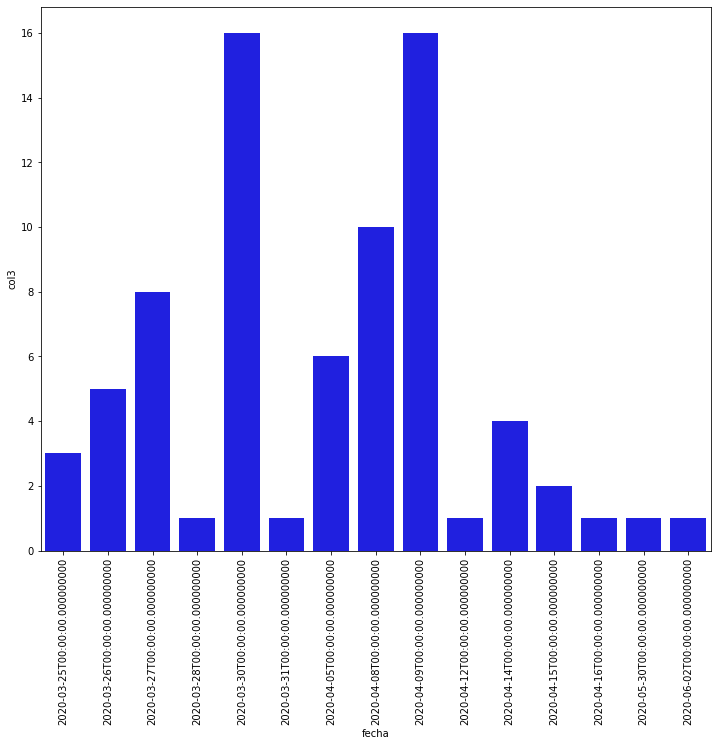

In [ ]:
cat2.rename(columns={ cat2.columns[0]: "Disculpame1" }, inplace = True)
cat2.rename(columns={ cat2.columns[1]: "Disculpame2" }, inplace = True)

cat2["col3"] = cat2.Disculpame2 + cat2.Disculpame1

cat2
plt.figure(figsize=(12,10))
sns.barplot(data=cat2, x=cat2.index, y=cat2.col3 , label='Fallas', color='Blue')
plt.xticks(rotation=90)

#4- Se correlaciona la evolución en el tiempo del asistente con la cantidad de respuestas fallidas?





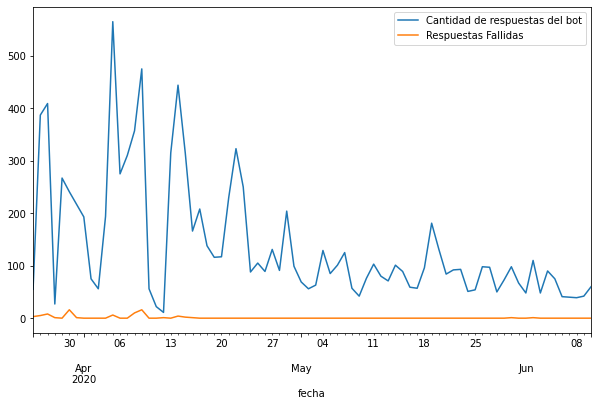

In [ ]:
#aca la Flor hablaba de un scatter.....no se me ocurre como armar un scatter ya q vemos fecha con cantidad (en un scatter creo q se veria una linea de puntos vericales)...o tendremos que comparar con otra variable en el eje Y??
#  si bien es una v.a. discreta creo q podemos usar este grafico de lineas para visualizar....seria el caso de un grafico de precios q lo solemos ver en lineas
# No veo una correlacion clara...no se uds..
df[df.evento=='bot'].groupby('fecha')['texto'].count().plot(legend=True, label= 'Cantidad de respuestas del bot')
df.groupby('fecha')['texto'].apply(lambda x: x[x.str.contains('Disculpame', na=False)].count()).plot(figsize=(10,6), legend=True, label='Respuestas Fallidas')


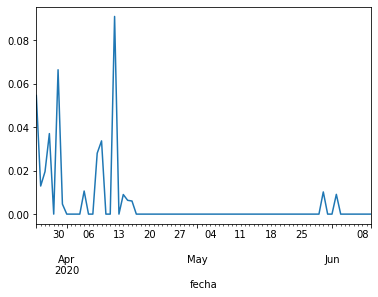

In [ ]:
#Respuesta fallidas por respuesta del bot
fallidos =df.groupby('fecha')['texto'].apply(lambda x: x[x.str.contains('Disculpame', na=False)].count())/df[df.evento=='bot'].groupby('fecha')['texto'].count()
fallidos.plot()

#5- Otra variable interesante para explorar y que esta relacionada con la mejora en la predicción del asistente es la confidence.

Realizamos un gráfico de linea para observar la evolución de la variable **confidence** a lo largo del tiempo. Es clara la tendencia que indica que a medida que avanza el tiempo, se obtiene un mejor resultado del la misma.

El gráfico plotea la media diara de la variable confidence.

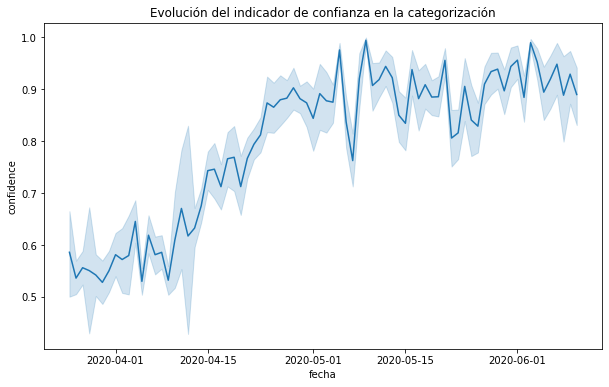

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='fecha', y='confidence', estimator='mean')
plt.title('Evolución del indicador de confianza en la categorización')

plt.show()


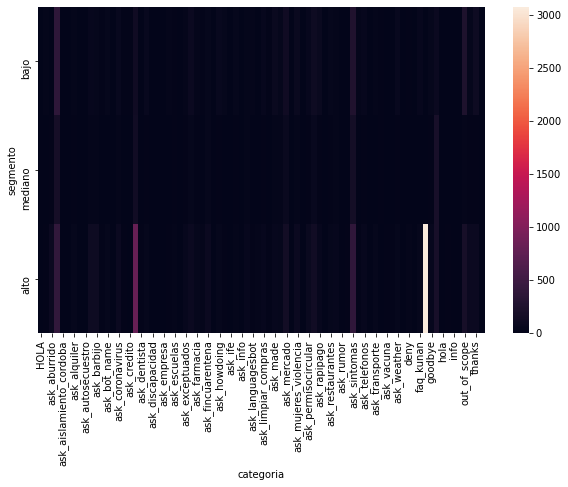

In [ ]:
df['segmento']= pd.cut(df.confidence, 3, labels=['bajo', 'mediano', 'alto'])
exp = pd.crosstab(df.segmento, df.categoria)
plt.figure(figsize=(10,6))
sns.heatmap(exp)

En este gráfico exploramos si hay categorias que se relacionan con segmentos de confidence con mayor fuerza, aunque no encontramos un patrón claro.